In [1]:
import pandas as pd
import numpy as np 
import json
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import * 
import networkx as nx

## Read in Data

In [89]:
df = pd.read_json('yelp_bizdata.json', lines=True) # business data 
df = df.rename(columns={'business_id': 'Business'})
dfuser = pd.read_json('yelp_userdata.json', lines=True)
dfuser = dfuser.rename(columns={'user_id': 'User'})
dfrev = pd.read_json('yelpreviews.json', lines=True)

In [130]:
dfrev

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...
2546944,CNfG18etDobCn-LlyH3TtQ,s6ZuqZLSlKvVZElSEd03Gw,sB9dNoHtrJ6YDU1ynz4lcg,5,0,0,0,2015-12-15 02:05:09
2546945,uxIlS76PxfWxBZt4LgvZFg,caiSZUruSw1fkVOHtlS4kw,U65ez9BbaXyqKrqI1Atviw,3,0,0,0,2019-03-03 19:40:03
2546946,OAG58lQj7cWVT57M81oCDg,Jax59T2jZ5qrMwB4MmxChw,0fWr9Ty_EGvimZ4h6Rw2yg,3,0,0,0,2018-12-02 16:31:03
2546947,mdk2z1NasChYZf3ztlnwFA,_vpRHhJxPnse-xEt7tKb3A,U2KZI_ELoyvlBq_RVR7t2Q,4,0,0,0,2021-01-22 20:17:11


In [32]:
userbiz_revpair = dfrev.iloc[:,0:3]
userbiz_revpair = userbiz_revpair.rename(columns={'review_id': 'Review', 'business_id': 'Business', 'user_id': 'User'})

In [72]:
userbiz_revpair[1:2]['Business']

1    RA4V8pr014UyUbDvI-LW2A
Name: Business, dtype: object

In [75]:
test_rev = []
testing = userbiz_revpair.loc[userbiz_revpair[0:]['Business'] == 'buF9druCkbuXLX526sGELQ']
testing = pd.DataFrame(testing).to_numpy()
test_rev.append(testing)
print(test_rev)
print(len(test_rev))
test2 = userbiz_revpair.loc[userbiz_revpair[0:]['Business'] == 'RA4V8pr014UyUbDvI-LW2A']
test2 = pd.DataFrame(test2).to_numpy()
test_rev.append(test2)
print(test_rev)
print(len(test_rev))
df_test = pd.DataFrame(test_rev, columns = ['Review', 'User', 'Business'])
df_test

[array([['lWC-xP3rd6obsecCYsGZRg', 'ak0TdVmGKo4pwqdJSTLwWw',
        'buF9druCkbuXLX526sGELQ'],
       ['hpcZLEzqD4_gPi6eSVi_Bg', 'Y-j2svl0M_5-jF1ehYuNPQ',
        'buF9druCkbuXLX526sGELQ'],
       ['3FvY1Se8y2WXqTbaANOqMw', 'xUCX4GhBpeWxZB0l2lmt_w',
        'buF9druCkbuXLX526sGELQ'],
       ['C1uQNP2ehBktS43ZRMEvkg', '2M6KFsWIUXElqcQRz4A0Qg',
        'buF9druCkbuXLX526sGELQ'],
       ['Cja8_35_kQDnF9g4voikzw', 't5SRIRU6INiAyVkiMJhRPA',
        'buF9druCkbuXLX526sGELQ'],
       ['iBd6WvCXER9aU6xfR8YtMA', 'Kgz8xohZN1r2e-qN5GQ2pQ',
        'buF9druCkbuXLX526sGELQ'],
       ['SDGgNabvLJ_XqXLmSGxZ6w', '1kM4jg4O-tFrmuBBnb8wdA',
        'buF9druCkbuXLX526sGELQ'],
       ['0amIc8rKH1E8dMNFMu5MeA', 'djp57omz9cccV1wI0_sqqA',
        'buF9druCkbuXLX526sGELQ'],
       ['OylWt3UcDEbOr2XlXRHpZA', 'l0gxisitVlPxXVQiIaEj7A',
        'buF9druCkbuXLX526sGELQ'],
       ['a_hHSmxAS3PQdgwOSsW92Q', 'HqOZgH-DKWov7a0UmzM00Q',
        'buF9druCkbuXLX526sGELQ'],
       ['A-KIqbE4pMSvBEA6nEqB4A', 'avQ84oaYIM0YTh

ValueError: Shape of passed values is (2, 1), indices imply (2, 3)

In [76]:
bis = df.loc[df['state'] == 'WA']
bis_ids = bis[0:]['Business']
bis_ids = pd.DataFrame(bis_ids).to_numpy()
## filter for city
city_reviews = []
for i in bis_ids:
    business = userbiz_revpair.loc[userbiz_revpair[0:]['Business'] == i[0]]
    if (business.empty != True):
        business = pd.DataFrame(business).to_numpy()
    for j in range(0,len(business)):
        city_reviews.append(business[j])
    
dfcity = pd.DataFrame(city_reviews, columns = ['Review', 'User', 'Business'])
print(dfcity)    

                       Review                    User                Business
0      PYrtPsd07oBSDp5HF5zQPg  XILSEok-O_4pBRWqfEv6uA  Yyym58vWvlRPuMCOICWRBw
1      qC9fMfucTub9pDaPguHJqw  -WjK92cNNSoJwm89uvb75A  Yyym58vWvlRPuMCOICWRBw
2      eLbDL0C4mg_2ypW69HoFIQ  Mto4EEpGm_Q4dDUUYYweRQ  Yyym58vWvlRPuMCOICWRBw
3      _7b-5RFgd8vb-ggFFG-kWQ  pyArLpxxzDYZQj7-x9nFiA  Yyym58vWvlRPuMCOICWRBw
4      yR3FL8UMyV_Cn2Of2IulGQ  ptb2nEgBng_wjZFD8Y0GfA  Yyym58vWvlRPuMCOICWRBw
...                       ...                     ...                     ...
36770  kMhgaKNqeSQHCJHTEy-iFQ  AgaHp8v8_ovLJY7QkP3SGw  Po3MPZ9ky6EzABt6G9jqWw
36771  kQ0tkdpulF3YR13EHHi9Mw  8PHaGSKDNOoqmvS1zEggrQ  Po3MPZ9ky6EzABt6G9jqWw
36772  XcdbGjurB8-o4mnifLJ9eQ  xxITyykPbM3lDQNarjEndA  Po3MPZ9ky6EzABt6G9jqWw
36773  f1pXJMcDN_1L-L2838UzHQ  6601h2G7YEgmoJA2OHr3EA  Po3MPZ9ky6EzABt6G9jqWw
36774  U1aW4Cg2MJtnHtuZeOBqLA  QXdSMCcwx3E8H4zQ_v7Vgg  Po3MPZ9ky6EzABt6G9jqWw

[36775 rows x 3 columns]


array(['1CHPSnEh4axD10HCqe8k-A'], dtype=object)

In [57]:
userbiz_revpair[0:]

,Review,User,Business
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA
...,...,...,...
2546944,CNfG18etDobCn-LlyH3TtQ,s6ZuqZLSlKvVZElSEd03Gw,sB9dNoHtrJ6YDU1ynz4lcg
2546945,uxIlS76PxfWxBZt4LgvZFg,caiSZUruSw1fkVOHtlS4kw,U65ez9BbaXyqKrqI1Atviw
2546946,OAG58lQj7cWVT57M81oCDg,Jax59T2jZ5qrMwB4MmxChw,0fWr9Ty_EGvimZ4h6Rw2yg
2546947,mdk2z1NasChYZf3ztlnwFA,_vpRHhJxPnse-xEt7tKb3A,U2KZI_ELoyvlBq_RVR7t2Q


## Information Cascade

In [211]:
userbiz_revpair = dfrev.iloc[:,0:4]
userbiz_revpair = userbiz_revpair.rename(columns={'review_id': 'Review', 'business_id': 'Business', 'user_id': 'User'})
# pass in userbiz_revpair as an array
def info_casc(bizid):
    biz_revs = userbiz_revpair.loc[userbiz_revpair[0:]['Business'] == bizid]
    x = np.arange(1, len(biz_revs['stars'])+1, 1)
    plot1 = plt.figure(1)
    plt.plot(x, biz_revs['stars'])
    plt.xlabel('Review Number')
    plt.ylabel('Star Rating')
    plt.title('Reviews over time for business')
    
    if (len(biz_revs['stars']) > 50):
        plot2 = plt.figure(2)
        plt.plot(x[0:50], biz_revs['stars'][0:50])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (0-50) over time for business')
        
    if (len(biz_revs['stars']) > 100):
        plot3 = plt.figure(3)
        plt.plot(x[50:100], biz_revs['stars'][50:100])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (50-100) over time for business')
        
    if (len(biz_revs['stars']) > 150):
        plot4 = plt.figure(4)
        plt.plot(x[100:150], biz_revs['stars'][100:150])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (100-150) over time for business')
    
    if (len(biz_revs['stars']) > 200):
        plot5 = plt.figure(5)
        plt.plot(x[150:200], biz_revs['stars'][150:200])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (150-200) over time for business')

    if (len(biz_revs['stars']) > 250):
        plot6 = plt.figure(6)
        plt.plot(x[200:250], biz_revs['stars'][200:250])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (200-250) over time for business')
        
    if (len(biz_revs['stars']) > 300):
        plot7 = plt.figure(7)
        plt.plot(x[250:300], biz_revs['stars'][250:300])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (250-300) over time for business')
        
    if (len(biz_revs['stars']) > 350):
        plot8 = plt.figure(8)
        plt.plot(x[300:350], biz_revs['stars'][300:350])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (300-350) over time for business')
    
    if (len(biz_revs['stars']) > 400):
        plot9 = plt.figure(9)
        plt.plot(x[350:400], biz_revs['stars'][350:400])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (350-400) over time for business')
        
    if (len(biz_revs['stars']) > 450):
        plot10 = plt.figure(10)
        plt.plot(x[400:450], biz_revs['stars'][400:450])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (400-450) over time for business')
    
    if (len(biz_revs['stars']) > 500):
        plot11 = plt.figure(11)
        plt.plot(x[450:500], biz_revs['stars'][450:500])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (450-500) over time for business')
        
    if (len(biz_revs['stars']) > 550):
        plot12 = plt.figure(12)
        plt.plot(x[500:550], biz_revs['stars'][500:550])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (500-550) over time for business')
    
    if (len(biz_revs['stars']) > 600):
        plot13 = plt.figure(13)
        plt.plot(x[550:600], biz_revs['stars'][550:600])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (550-600) over time for business')
        
    if (len(biz_revs['stars']) > 650):
        plot14 = plt.figure(14)
        plt.plot(x[600:650], biz_revs['stars'][600:650])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (600-650) over time for business')
    
    if (len(biz_revs['stars']) > 700):
        plot15 = plt.figure(15)
        plt.plot(x[650:700], biz_revs['stars'][650:700])
        plt.xlabel('Review Number')
        plt.ylabel('Star Rating')
        plt.title('Reviews (650-700) over time for business')

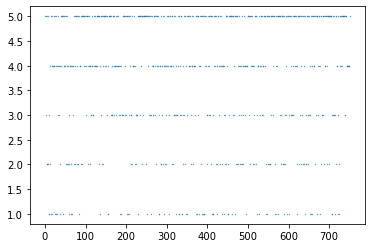

In [195]:
biz_revs = userbiz_revpair.loc[userbiz_revpair[0:]['Business'] == 'R8fLQ6TLz06MQR69KQJ83g']
biz_revs['stars']
len(biz_revs['stars'])
x = np.arange(1, len(biz_revs['stars'])+1, 1)
x
plt.scatter(x, biz_revs['stars'], s = 0.1)

In [196]:
biz_revs['stars']

2928      5
5400      5
6777      3
10966     5
11406     2
         ..
852615    4
854742    4
856966    4
858226    4
860983    5
Name: stars, Length: 751, dtype: int64

### top two in colorado

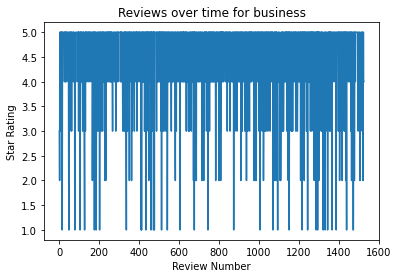

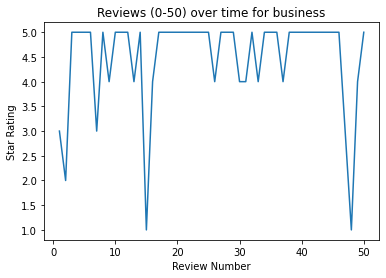

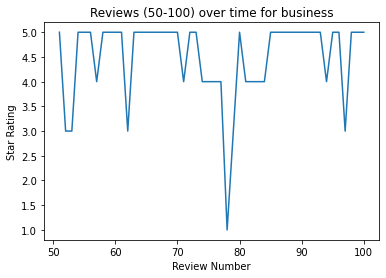

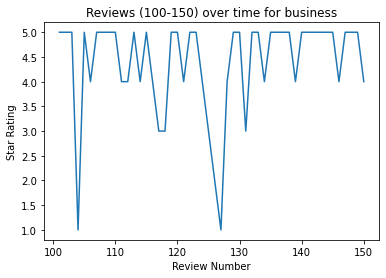

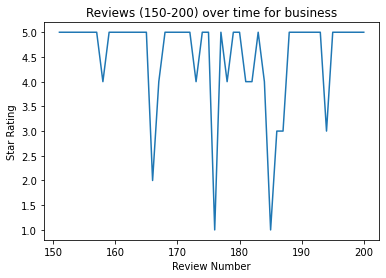

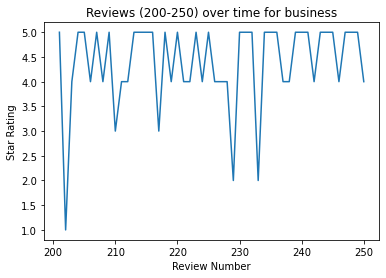

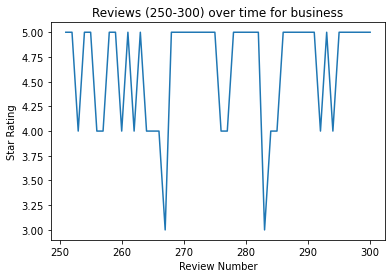

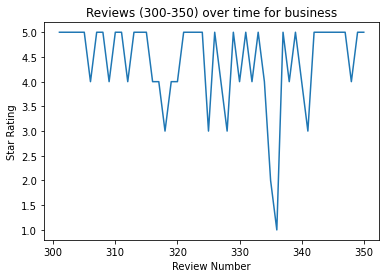

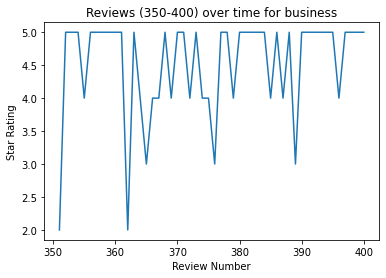

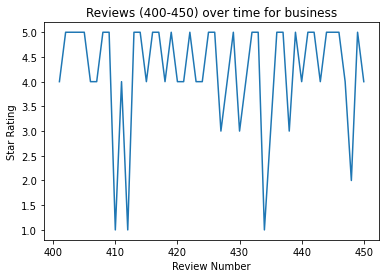

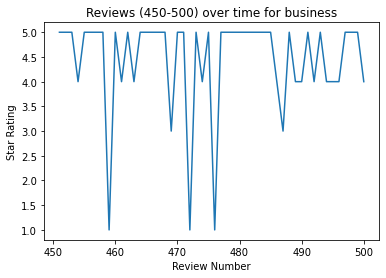

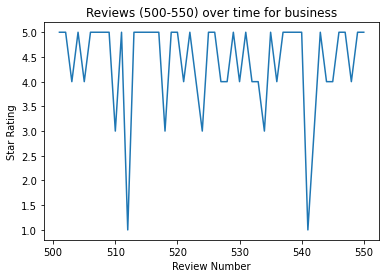

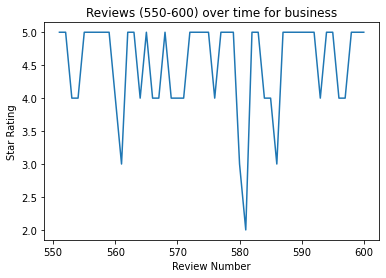

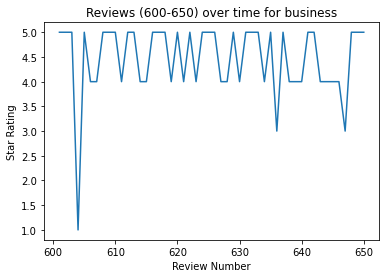

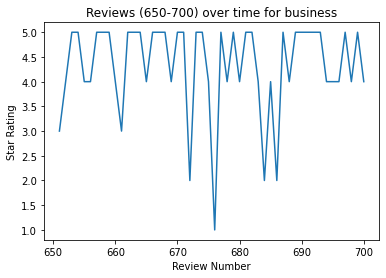

In [214]:
info_casc('SFlAWPKHOJEsTttBLUj8Hw')

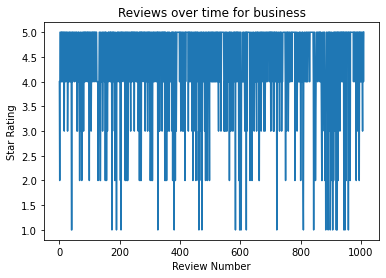

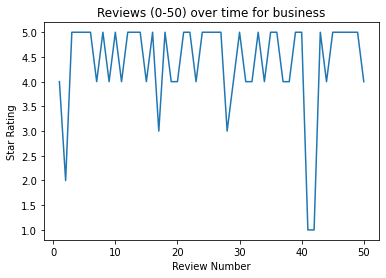

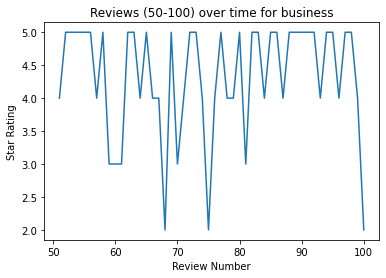

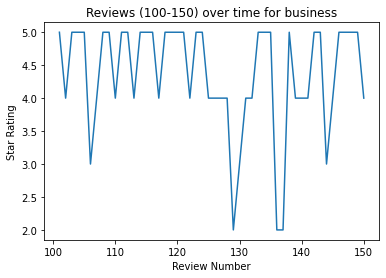

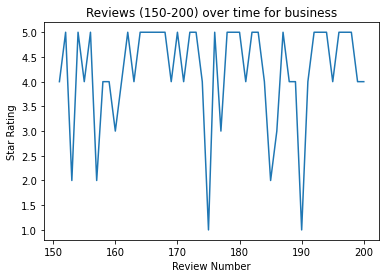

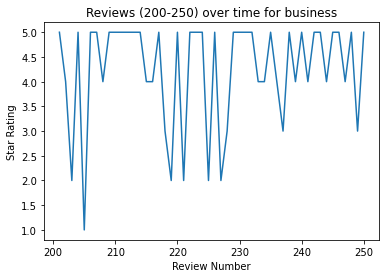

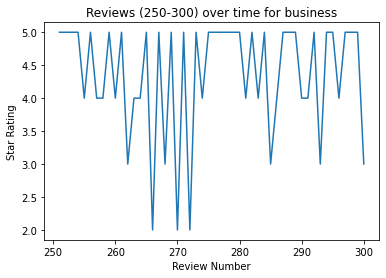

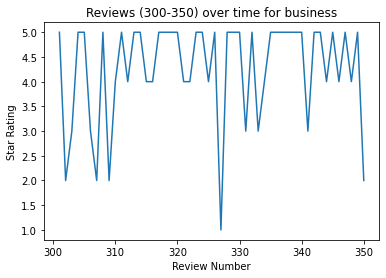

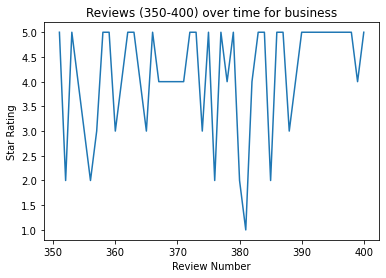

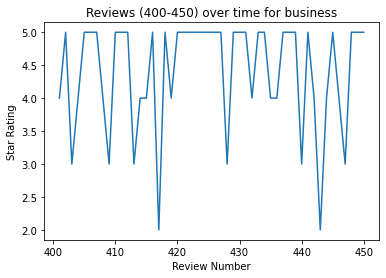

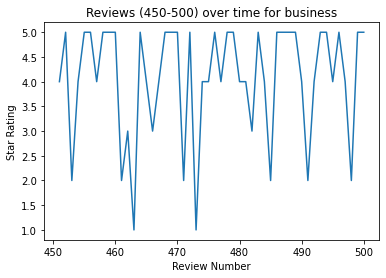

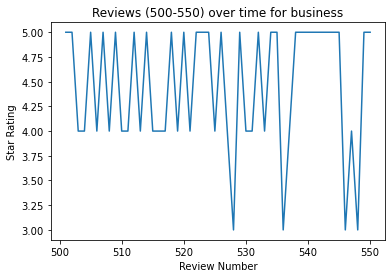

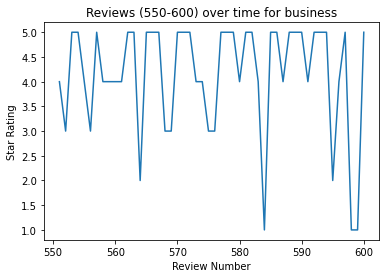

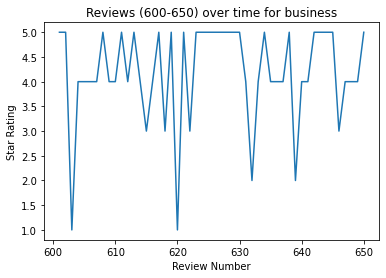

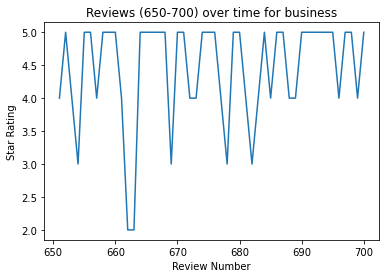

In [215]:
info_casc('8zehGz9jnxPqXtOc7KaJxA')

### bottom two in colorado

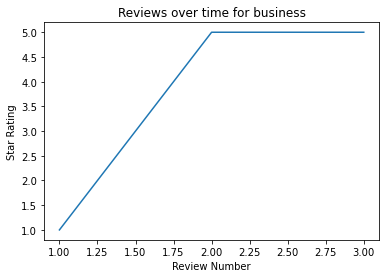

In [216]:
info_casc('4c6BrNzSoxgD_SnNY6Hbew')

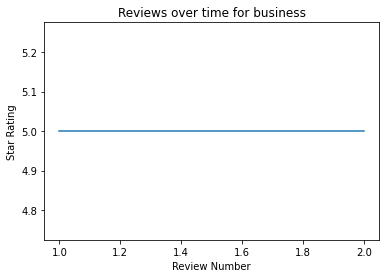

In [217]:
info_casc('Po-Wuw1rnXAANEIpiTTg1g')

### top two in wash

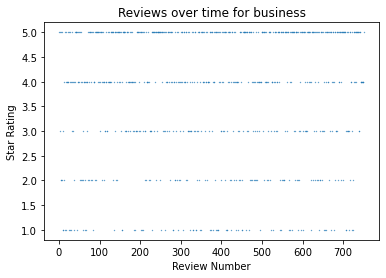

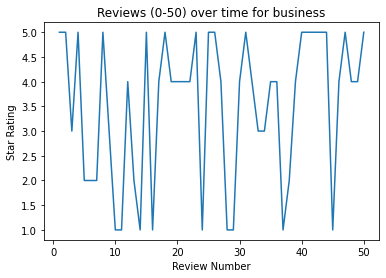

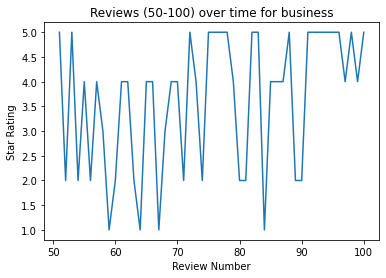

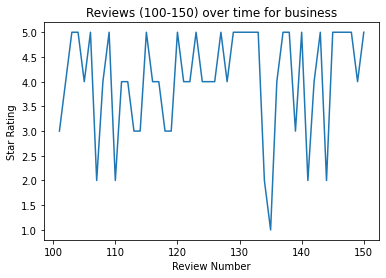

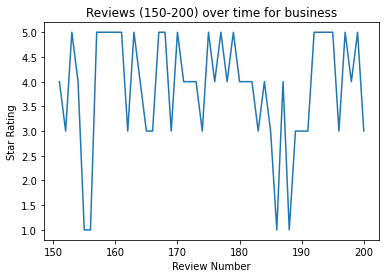

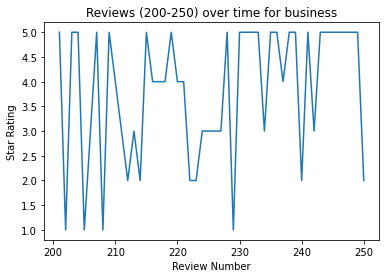

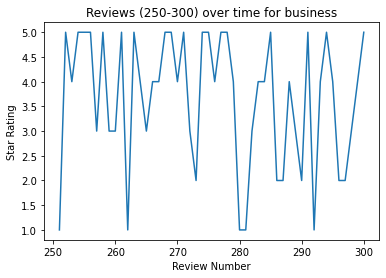

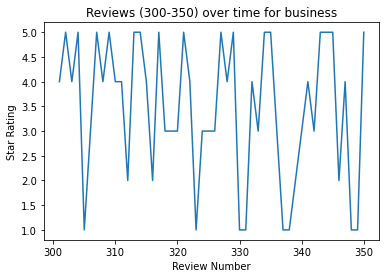

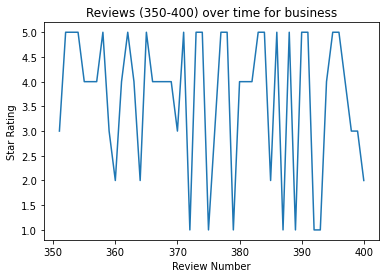

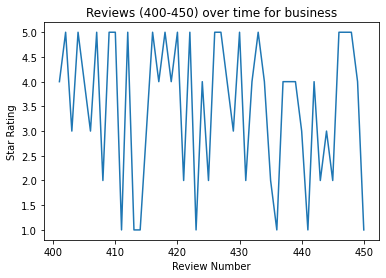

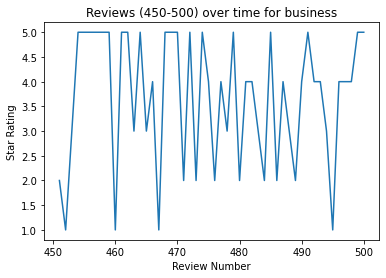

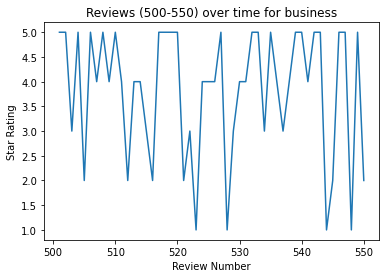

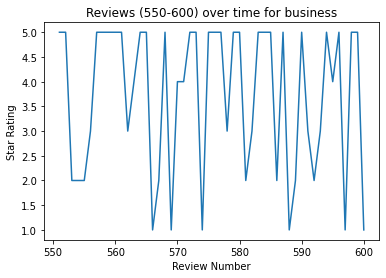

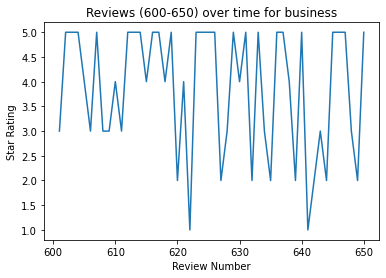

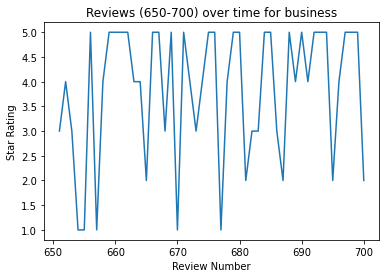

In [201]:
info_casc('R8fLQ6TLz06MQR69KQJ83g')

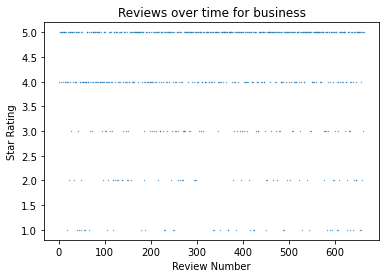

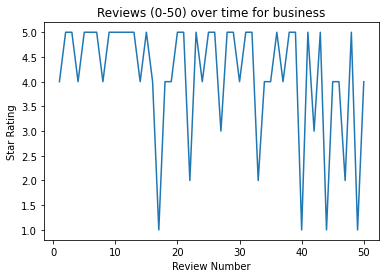

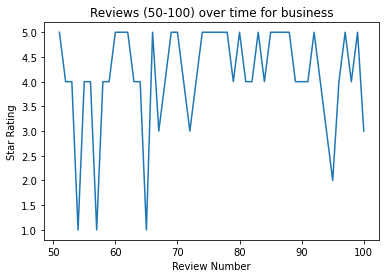

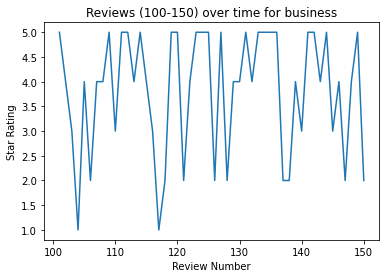

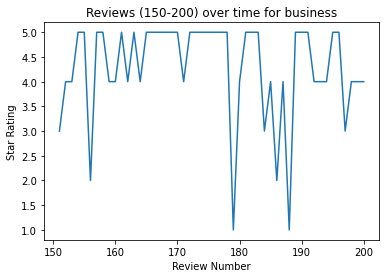

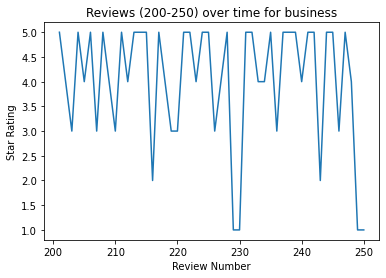

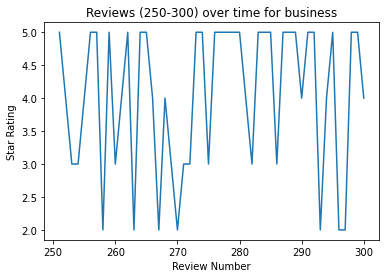

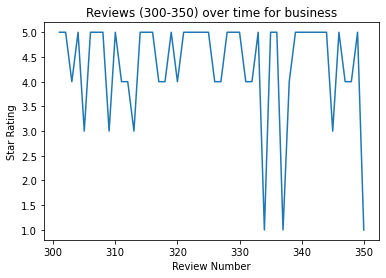

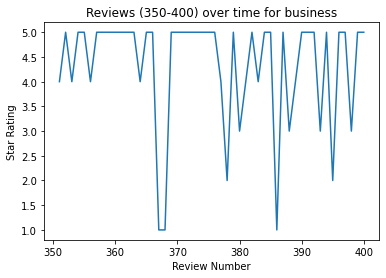

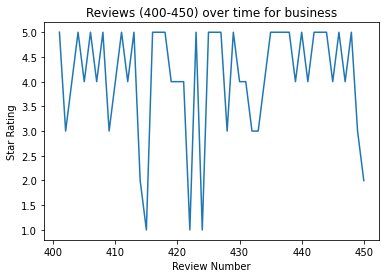

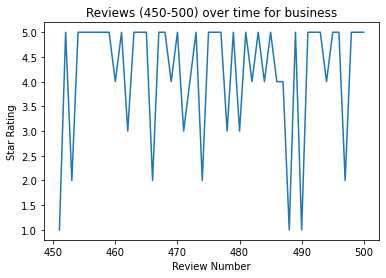

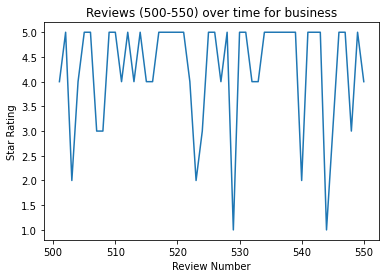

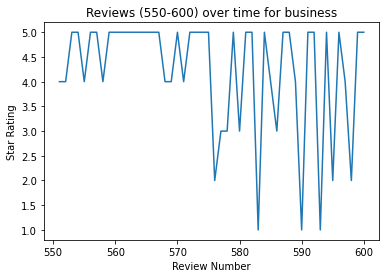

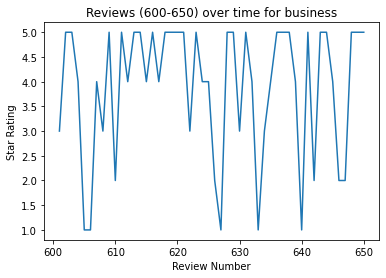

In [202]:
info_casc('JkhXi-3RJtmUTlkjrSdWSw')

### bottom two in wash

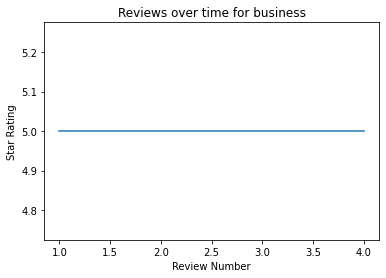

In [212]:
info_casc('dHM0Y69CvH9xEQaAJDv1nQ')

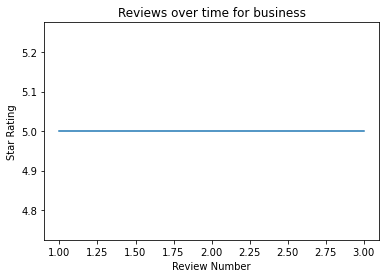

In [213]:
info_casc('8u_Btq9k829del1_UPwW9A')

# Filter by City Function

In [ ]:
userbiz_revpair = dfrev.iloc[:,0:3]
userbiz_revpair = userbiz_revpair.rename(columns={'review_id': 'Review', 'business_id': 'Business', 'user_id': 'User'})
# pass in userbiz_revpair as an array
def filter_city(state):
    bis = df.loc[df['state'] == state]
    bis_ids = bis[0:]['Business']
    bis_ids = pd.DataFrame(bis_ids).to_numpy()
    ## filter for city
    city_reviews = []
    for i in bis_ids:
        business = userbiz_revpair.loc[userbiz_revpair[0:]['Business'] == i[0]]
        if (business.empty != True):
            business = pd.DataFrame(business).to_numpy()
        for j in range(0,len(business)):
            city_reviews.append(business[j])

    dfcity = pd.DataFrame(city_reviews, columns = ['Review', 'User', 'Business'])
     
    bis_ids_rev = dfcity.Business.unique()
    biz_stats = []
    by_biz = dfcity.groupby('Business')

    for i in range(0,len(bis_ids_rev)):
        biz = bis_ids_rev[i]
        total_rev = len(by_biz.get_group(biz))
        biz_stats.append([biz,total_rev])
    df_biztotalrev = pd.DataFrame(biz_stats, columns = ['Business', 'Number of Reviews Received'])

    city_ind_id = dfcity.User.unique()
    ind_stats = []
    by_ind = dfcity.groupby('User')

    for i in range(0,len(city_ind_id)):
        ind = city_ind_id[i]
        total_rev = len(by_ind.get_group(ind)['Review'])
        ind_stats.append([ind,total_rev])
    df_indtotalrev = pd.DataFrame(ind_stats, columns = ['User', 'Number of Reviews Given'])
    
    city_hubs = df_indtotalrev.rename(columns={'Number of Reviews Given': 'Hub Score'})
    city_auth = df_biztotalrev.rename(columns={'Number of Reviews Received': 'Auth Score'})
    
    return  city_hubs, city_auth, dfcity

In [78]:
## Hub and Authorities

def h_and_a(k, hubs, auth, dfcity):
    ind_ids = hubs.User.unique()
    biz_ids = auth.Business.unique()
    
    by_ind = dfcity.groupby('User')
    by_biz = dfcity.groupby('Business')
    
    for a in range(0,k):
        # one round update authority scores
        for j in range(0,len(biz_ids)):
            biz = biz_ids[j] # finds business j
            biz_users = np.asarray(by_biz.get_group(biz)['User']) # forms array with user id of all users who have reviewed business j
            authscore = 0 # restarts authority score
            for i in range(0,len(biz_users)):
                ind = biz_users[i] # for every user i that has reviewed business j
                authscore = authscore + int(hubs.loc[hubs['User']== ind]['Hub Score'])
            auth.at[j,'Auth Score'] = authscore
            
        # one round update hub scores
        for i in range(0,len(ind_ids)):
            ind = ind_ids[i] # finds ind i 
            ind_busi = np.asarray(by_ind.get_group(ind)['Business']) # forms array with business id of all businesses reviewed by ind
            hubscore = 0 # restarts hub score
            for j in range(0,len(ind_busi)):
                biz = ind_busi[j] 
                hubscore = hubscore + int(auth.loc[auth['Business']== biz]['Auth Score'])
            hubs.at[i,'Hub Score'] = hubscore
        
        return hubs, auth

In [96]:
## Star Ratings and Scores
def compare(hubs, auth):
    ind_ids = hubs.User.unique()
    biz_ids = auth.Business.unique()
    dfbizrate = df.iloc[:,np.r_[0:2, 8]]
    dfuserrate = dfuser.iloc[:,np.r_[0:1, 4, 10]] 
    
    # filtering business data
    city_bizrate = []
    for i in biz_ids:
        biz = dfbizrate.loc[dfbizrate[0:]['Business'] == i]
        biz = pd.DataFrame(biz).to_numpy()
        city_bizrate.append(biz)
        
    
    # filtering user data
    city_userrate = []
    for i in ind_ids:
        ind = dfuserrate.loc[dfuserrate[0:]['User'] == i]
        if (ind.empty != True):
            ind = pd.DataFrame(ind).to_numpy()
            #print(ind)
            city_userrate.append(ind)
    
    # arrays to datframes
    city_userrate = pd.DataFrame(city_userrate, columns = ['User', 'useful', 'average_stars'])
    city_bizrate = pd.DataFrame(city_bizrate, columns = ['Business', 'Name', 'stars'])
    
    city_userrate = city_userrate[city_userrate.User != '#NAME?']
    city_bizrate = city_bizrate[city_bizrate.Business != '#NAME?']
    
    # Adding Authority Scores
    city_auth_scores = []

    for i in range (0, len(biz_ids)):
        if(auth['Business'][i] == biz_ids[i]):
            city_auth_scores.append(auth['Auth Score'][i])

    city_bizrate.insert(3, 'Auth Score', city_auth_scores)    
    
    # Adding Hub Scores
    city_hub_scores = []
    for i in range (0, len(ind_ids)):
        if(hubs['User'][i] == ind_ids[i]):
            city_hub_scores.append(hubs['Hub Score'][i])

    city_userrate.insert(3, 'Hub Score', city_hub_scores) 
    
    # Plot Hub
    plt.scatter(city_userrate['useful'], city_userrate['Hub Score'])
    plt.xlabel('Useful Rating')
    plt.ylabel('Hub Score')
    
    plt.scatter(city_userrate['average_stars'], city_userrate['Hub Score'])
    plt.xlabel('Average Star Rating Given')
    plt.ylabel('Hub Score')
    
    # Plot Authority
    
    plt.scatter(city_bizrate['stars'], city_bizrate['Auth Score'])
    plt.xlabel('Average Star Rating')
    plt.ylabel('Authority Score')


In [121]:
## Star Ratings and Scores
def filter_ratings(hubs, auth):
    ind_ids = hubs.User.unique()
    biz_ids = auth.Business.unique()
    dfbizrate = df.iloc[:,np.r_[0:2, 8]]
    dfuserrate = dfuser.iloc[:,np.r_[0:1, 4, 10]] 
    
    
    # filtering business data
    city_bizrate = []
    for i in biz_ids:
        biz = dfbizrate.loc[dfbizrate[0:]['Business'] == i]
        biz = pd.DataFrame(biz).to_numpy()
        for j in range(0,len(biz)):
            city_bizrate.append(biz[j])
        
    
    # filtering user data
    city_userrate = []
    for i in ind_ids:
        ind = dfuserrate.loc[dfuserrate[0:]['User'] == i]
        if (ind.empty != True):
            ind = pd.DataFrame(ind).to_numpy()
            for j in range(0,len(ind)):
                city_userrate.append(ind[j])
    
    # arrays to datframes
    city_userrate = pd.DataFrame(city_userrate, columns = ['User', 'useful', 'average_stars'])
    city_bizrate = pd.DataFrame(city_bizrate, columns = ['Business', 'Name', 'stars'])
    
    city_userrate = city_userrate[city_userrate.User != '#NAME?']
    city_bizrate = city_bizrate[city_bizrate.Business != '#NAME?']
    
    return city_userrate, city_bizrate

In [119]:
dfbizrate = df.iloc[:,np.r_[0:2, 8]]
dfbizrate

,Business,name,stars
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,4.0
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4.5
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,3.0
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,4.0
...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,4.0
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,4.5
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,5.0
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,4.0


In [120]:
dfuserrate = dfuser.iloc[:,np.r_[0:1, 4, 10]]
dfuserrate

,User,useful,average_stars
0,q_QQ5kBBwlCcbL1s4NVK3g,15038,3.85
1,dIIKEfOgo0KqUfGQvGikPg,21272,4.09
2,D6ErcUnFALnCQN4b1W_TlA,188,3.76
3,JnPIjvC0cmooNDfsa9BmXg,7234,3.77
4,37Hc8hr3cw0iHLoPzLK6Ow,1577,3.72
...,...,...,...
2189452,OrXXOTSQG2hLEoZ4sw03Gg,0,1.00
2189453,pYZ4Dyx5I92u5gDfGiVTpQ,0,4.33
2189454,DhrXTJRTLhnvI9UI1q63mg,3,4.20
2189455,ka06dBaC9tvKhc7DJ9_7wQ,4,3.89


In [126]:
def compare_ratings(hubs, auth):
    ind_ids = hubs.User.unique()
    biz_ids = auth.Business.unique()
    # Adding Authority Scores
    city_auth_scores = []

    for i in range (0, len(biz_ids)):
        if(auth['Business'][i] == biz_ids[i]):
            city_auth_scores.append(auth['Auth Score'][i])

    #city_bizrate.insert(3, 'Auth Score', city_auth_scores)    
    
    # Adding Hub Scores
    city_hub_scores = []
    for i in range (0, len(ind_ids)):
        if(hubs['User'][i] == ind_ids[i]):
            city_hub_scores.append(hubs['Hub Score'][i])

    #city_userrate.insert(3, 'Hub Score', city_hub_scores) 
    
    # Plot Hub
    plot1 = plt.figure(1)
    plt.scatter(city_userrate['useful'], city_userrate['Hub Score'])
    plt.xlabel('Useful Rating')
    plt.ylabel('Hub Score')
    plt.title('Useful Rating Received vs Calculated Hub Score')
    
    plot2 = plt.figure(2)
    plt.scatter(city_userrate['average_stars'], city_userrate['Hub Score'])
    plt.xlabel('Average Star Rating Given')
    plt.ylabel('Hub Score')
    plt.title('Average Star Rating Given vs Calculated Hub Score')
    
    # Plot Authority
    plot3 = plt.figure(3)
    plt.scatter(city_bizrate['stars'], city_bizrate['Auth Score'])
    plt.xlabel('Average Star Rating')
    plt.ylabel('Authority Score')
    plt.title('Average Star Rating vs Calculated Authority Score')

In [97]:
states = ['BC', 'CO', 'FL', 'GA', 'MA', 'OH','OR', 'TX', 'WA']

# WA

In [109]:
hubs, auth, dfcity = filter_city('WA')

In [110]:
k = 2
hubs, auth = h_and_a(k, hubs, auth, dfcity)

In [118]:
dfcity

,Review,User,Business
0,PYrtPsd07oBSDp5HF5zQPg,XILSEok-O_4pBRWqfEv6uA,Yyym58vWvlRPuMCOICWRBw
1,qC9fMfucTub9pDaPguHJqw,-WjK92cNNSoJwm89uvb75A,Yyym58vWvlRPuMCOICWRBw
2,eLbDL0C4mg_2ypW69HoFIQ,Mto4EEpGm_Q4dDUUYYweRQ,Yyym58vWvlRPuMCOICWRBw
3,_7b-5RFgd8vb-ggFFG-kWQ,pyArLpxxzDYZQj7-x9nFiA,Yyym58vWvlRPuMCOICWRBw
4,yR3FL8UMyV_Cn2Of2IulGQ,ptb2nEgBng_wjZFD8Y0GfA,Yyym58vWvlRPuMCOICWRBw
...,...,...,...
36770,kMhgaKNqeSQHCJHTEy-iFQ,AgaHp8v8_ovLJY7QkP3SGw,Po3MPZ9ky6EzABt6G9jqWw
36771,kQ0tkdpulF3YR13EHHi9Mw,8PHaGSKDNOoqmvS1zEggrQ,Po3MPZ9ky6EzABt6G9jqWw
36772,XcdbGjurB8-o4mnifLJ9eQ,xxITyykPbM3lDQNarjEndA,Po3MPZ9ky6EzABt6G9jqWw
36773,f1pXJMcDN_1L-L2838UzHQ,6601h2G7YEgmoJA2OHr3EA,Po3MPZ9ky6EzABt6G9jqWw


In [114]:
hubs.to_csv('washington_hubs.csv')

In [115]:
auth.to_csv('washington_auth.csv')

In [116]:
dfcity.to_csv('washington_dfcity.csv')

In [122]:
city_userrate, city_bizrate = filter_ratings(hubs, auth)

ur = len(city_userrate)
br = len(city_bizrate)

with open('washington_userrate.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,ur):
        mywriter.writerows(city_userrate[i:i+1])
        
with open('washington_bizrate.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,br):
        mywriter.writerows(city_bizrate[i:i+1])

In [132]:
city_userrate.to_csv('washington_city_userrate.csv')

In [133]:
city_bizrate.to_csv('washington_city_bizrate.csv')

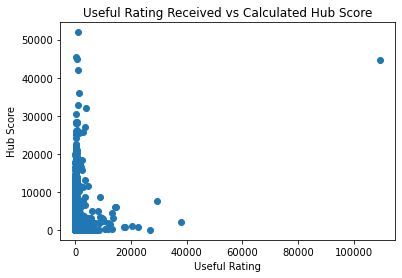

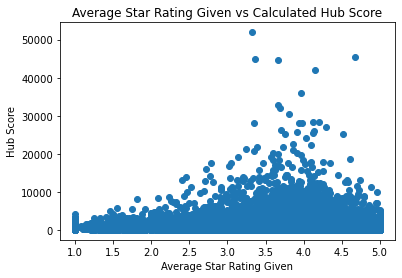

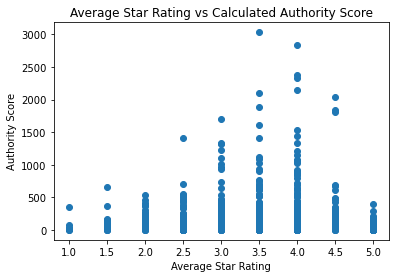

In [127]:
compare_ratings(hubs,auth)

In [ ]:
compare(hubs,auth)

In [128]:
wash_hubs = hubs.sort_values(by='Hub Score', ascending=False)
wash_hubs

,User,Hub Score
490,f3xJJpUIFWmdZhhc912Leg,51939
1244,m0hI5Q0XvtCN6SGmkX-brw,45422
787,jB4DwtUC8l0E8iFzAnPozQ,44850
117,AbMjnKOwg736fcIu8apuyQ,44585
521,wfvtOrGyJbYS61qjaHcJng,41923
...,...,...
19152,7GhZ8lMAdUSWeW6srMDIJw,4
19151,F5KTZyjy4lpNVl0MlIciLw,4
17592,s8eytQsl1wqa5qpMqhlxRw,3
17591,AZ3FHB_vJPXrqOqo4QHPJQ,3


In [129]:
wash_auth = auth.sort_values(by='Auth Score', ascending=False)
wash_auth

,Business,Auth Score
100,R8fLQ6TLz06MQR69KQJ83g,3030
236,JkhXi-3RJtmUTlkjrSdWSw,2840
160,rgGJMwcrNTuCcY493q_YuA,2373
49,TDQ0lSTHW3RyfVWQuwbBGg,2322
157,PgAihGrv8kHaV_6zIAwvEQ,2145
...,...,...
42,zqMeyheGDu5f5xACncsosw,5
781,O0UPp54_jWnlYujfL5eudw,5
784,5l_9qACn1gU2omzZWbc70w,5
787,dHM0Y69CvH9xEQaAJDv1nQ,4


## OH

In [ ]:
hubs, auth, dfcity = filter_city('OH')
hubs, auth = h_and_a(k, hubs, auth, dfcity)

In [ ]:
import csv

h = len(hubs)
a = len(auth)
c = len(dfcity)

with open('ohio_hubs.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,h):
        mywriter.writerows(hubs[i])
        
with open('ohio_auth.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,a):
        mywriter.writerows(auth[i])

with open('ohio_dfcity.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    for i in range(0,c):
        mywriter.writerows(dfcity[i])

In [ ]:
compare(hubs,auth)

## FL

In [16]:
hubs, auth, dfcity = filter_city('FL')
hubs, auth = h_and_a(k, hubs, auth, dfcity)
compare(hubs,auth)

KeyboardInterrupt: 